<a href="https://colab.research.google.com/github/DatumLearning/Mediapipe-playlist/blob/main/gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

In [ ]:
image = mp.Image.create_from_file("/content/palm.jpg")
recognition_result = recognizer.recognize(image)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
dir(recognition_result)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'gestures',
 'hand_landmarks',
 'hand_world_landmarks',
 'handedness']

In [ ]:
recognition_result.gestures[0][0]

Category(index=-1, score=0.6217820048332214, display_name='', category_name='Open_Palm')

In [ ]:
name = recognition_result.gestures[0][0].category_name
score = recognition_result.gestures[0][0].score
name , score

('Open_Palm', 0.6217820048332214)

In [ ]:
cords = recognition_result.hand_landmarks[0][13]
x_cord , y_cord = cords.x , cords.y

In [ ]:
x_cord , y_cord

(0.5659017562866211, 0.36560389399528503)

In [ ]:
recognition_result.handedness

[[Category(index=1, score=0.9878946542739868, display_name='Left', category_name='Left')]]

In [ ]:
img = cv2.imread("/content/palm.jpg")
h , w , _ = img.shape
h , w

(4804, 3202)

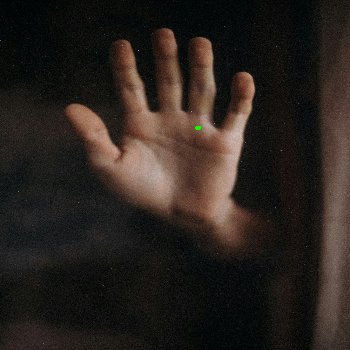

In [ ]:
img = cv2.imread("/content/palm.jpg")
ig = cv2.circle(img , (int(x_cord * w) , int(y_cord * h)) , 30 , (0 , 255 , 0) , -1)
ig = cv2.resize(ig , (350 , 350))
cv2_imshow(ig)